Dataset link :- https://www.kaggle.com/c/titanic

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/content/titanic.csv')

1. Display Top 5 Rows of The Dataset

In [2]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Check the Last 3 Rows of The Dataset

In [3]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


3. Find Shape of Our Dataset (Number of Rows & Number of Columns)

In [4]:
data.shape

(891, 12)

4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


5. Get Overall Statistics About The Dataframe

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6. Data Filtering

In [8]:
data.columns
sum(data['Survived']==1)

342

7.Check Null Values In The Dataset

<AxesSubplot:>

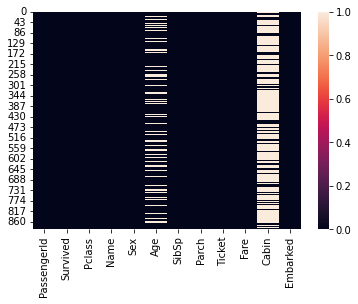

In [12]:
data.isnull().sum()

sns.heatmap(data.isnull())

8. Drop the Column

In [17]:
data.drop('Cabin', axis = 1, inplace = True)


In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

9. Handle Missing Values

In [21]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [24]:
data['Embarked'].fillna('S', inplace = True)
data['Embarked'].isnull().sum()

0

In [26]:
data['Age'].mean()
data['Age'].fillna(data['Age'].mean(), inplace = True)

10. Categorical Data Encoding


In [28]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
Gender = data['Sex'].map({'male':1, 'female':0})

In [32]:
data.insert(5, 'En.Gender', Gender)

In [33]:
data

,PassengerId,Survived,Pclass,Name,Sex,En.Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,C,1


In [34]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [36]:
pd.get_dummies(data, columns = ['Embarked'], drop_first = True)

,PassengerId,Survived,Pclass,Name,Sex,En.Gender,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.000000,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,1,35.000000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,0,0,111369,30.0000,1,0,0


11. What is Univariate Analysis?

How Many People Survived And How Many Died?

In [39]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

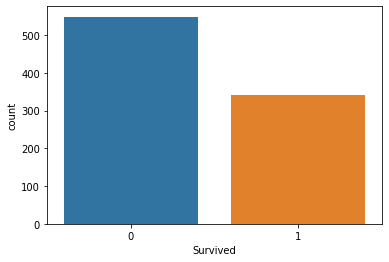

In [40]:
sns.countplot(data['Survived'])

How Many Passengers Were In First Class, Second Class, and Third Class?

In [42]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

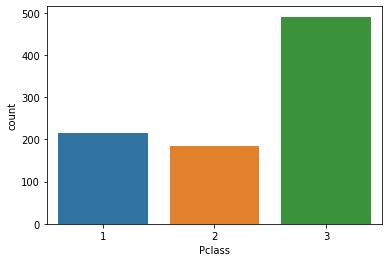

In [43]:
sns.countplot(data['Pclass'])

Number of Male And Female Passengers

In [44]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

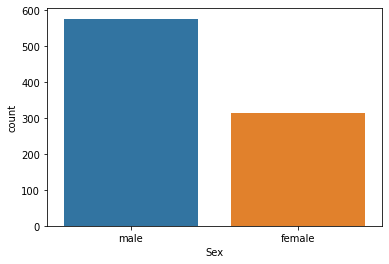

In [45]:
sns.countplot(data['Sex'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

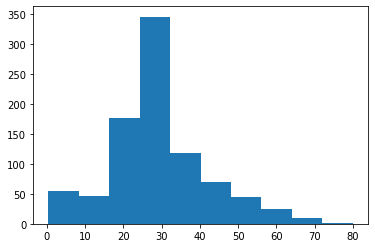

In [46]:
plt.hist(data['Age'])

12. Bivariate Analysis

In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'En.Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

How Has Better Chance of Survival Male or Female?

In [58]:
data[data['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

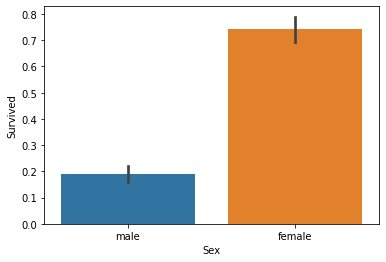

In [49]:
sns.barplot(x='Sex', y='Survived', data = data)

Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)? 

13. Feature Engineering

In [51]:
data['Family'] = data['SibSp'] + data['Parch']

In [53]:
data['Fare_Per_Person'] = data['Fare'] / (data['Family'] + 1)